In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

# Data

In [3]:
dataframe = pd.read_csv('Oxides_firstnumpy.csv')

val_dataframe = dataframe.sample(frac=0.3, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 520 samples for training and 223 for validation


In [5]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Perovskite_label")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [7]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [11]:
# Numerical features
Atom1 = keras.Input(shape=(1,), name="Atom1")
Atom2 = keras.Input(shape=(1,), name="Atom2")
Atom3 = keras.Input(shape=(1,), name="Atom3")
Atom4 = keras.Input(shape=(1,), name="Atom4")



all_inputs = [
    Atom1,
    Atom2, 
    Atom3, 
    Atom4, 
]

# Integer categorical features
Atom1_encoded = encode_integer_categorical_feature(Atom1, "Atom1", train_ds)
Atom2_encoded = encode_integer_categorical_feature(Atom2, "Atom2", train_ds)
Atom3_encoded = encode_integer_categorical_feature(Atom3, "Atom3", train_ds)
Atom4_encoded = encode_integer_categorical_feature(Atom4, "Atom4", train_ds)

all_features = layers.concatenate(
    [
    Atom1_encoded,
    Atom2_encoded,
    Atom3_encoded,
    Atom4_encoded,
    ]
)

x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

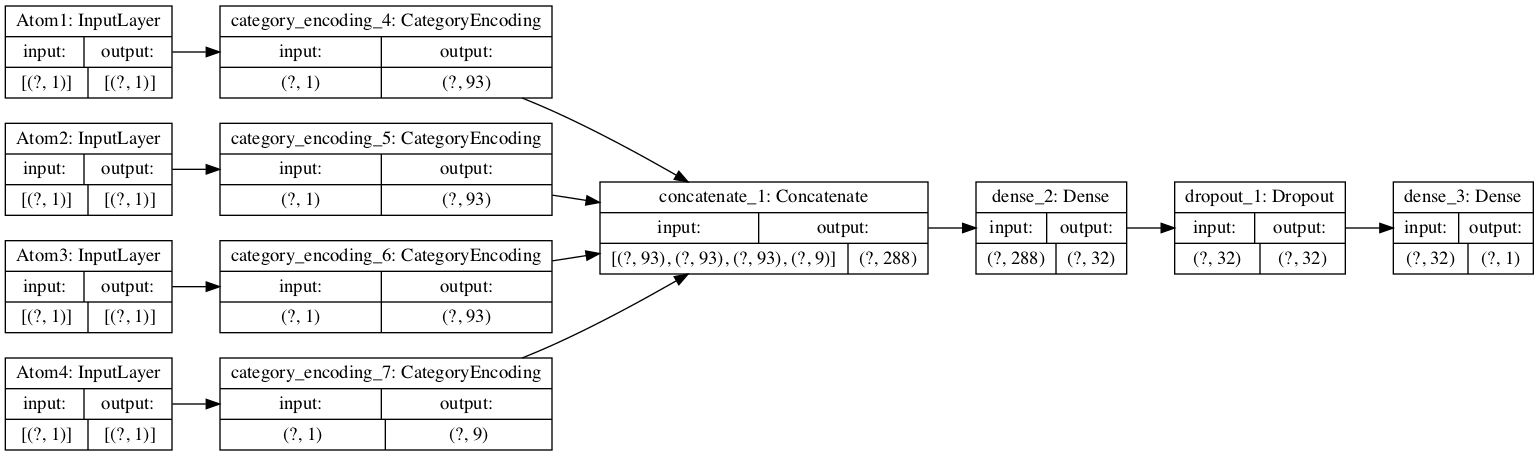

In [12]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [13]:
model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
17/17 [==============================] - 0s 21ms/step - loss: 0.6961 - accuracy: 0.5308 - val_loss: 0.6762 - val_accuracy: 0.6502
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.5904 - val_loss: 0.6585 - val_accuracy: 0.6951
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6827 - val_loss: 0.6403 - val_accuracy: 0.6906
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.7096 - val_loss: 0.6214 - val_accuracy: 0.7085
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6046 - accuracy: 0.7173 - val_loss: 0.6027 - val_accuracy: 0.7265
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.7058 - val_loss: 0.5842 - val_accuracy: 0.7444
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7250 - val_loss: 0.5639 - val_accuracy: 0.7623
Epoch 8/20
17/17 [=

In [14]:
model.evaluate(val_ds)

7/7 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8341


[0.399839848279953, 0.834080696105957]